In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlpgwauratrik

import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
#import mlpgw

In [2]:
model = mlpgwauratrik.load_obj('/home/auratrik/Desktop/Untitled Folder/model')

In [3]:
# Define waveform parameters
m1 = 16
m2 = 4
s1z = 0.5
s2z = 0.8
distance = 400
phi = np.pi/4
inclination = np.pi/3

# Make prediction
h_pred = model.predict(m1=m1, m2=m2, s1z=s1z, s2z=s2z, distance=distance, phi=phi, inclination=inclination, use_package="jax")

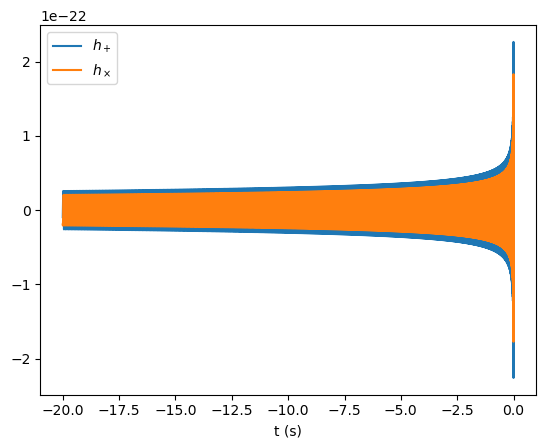

In [4]:
# Plot it
plt.figure()
plt.plot(h_pred['time'], h_pred['hp'], label=r'$h_+$')
plt.plot(h_pred['time'], h_pred['hc'], label=r'$h_\times$')
plt.xlabel('t (s)')
plt.legend()
plt.show()

In [5]:
# Simulation with SEOBNRv4
h = mlpgwauratrik.CompactBinary(m1=m1, m2=m2, s1z=s1z, s2z=s2z).get_waveform(distance=distance, phi=phi, inclination=inclination)

In [6]:
resampler = mlpgwauratrik.Transformer(name='resample', new_time=h_pred['time'])
h = resampler.transform(**h)

In [7]:
# Compute the mismatch
print("Mismatch metric: {}".format(1-mlpgwauratrik._match_metric(h, h_pred)))

Mismatch metric: 4.864373270296873e-06
